<a href="https://colab.research.google.com/github/CodingWithMK/Global_AI_Hub_Aygaz_IntroductionToAI_Project/blob/main/Global_AI_Hub_Introduction_to_AI_2024_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello everybody! Today we are going to make some Data Analysis on the preuploaded Minst Dataset which is on kaggle. This is a project for the "Introduction to Artificial Intelligence" Bootcamp of Global AI Hub by a coorporation with Aygaz. I hope this will be a helpful and great data analytics project if you are a beginner or a junior envolving data analyst.

# **1 - Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings


In [ ]:
warnings.filterwarnings("ignore") # Add this statement to avoid filtering problems in our future model

# **2 - Uploading Dataset**

In [ ]:
mnist_df = tf.keras.datasets.mnist

In [ ]:
df = mnist_df.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# **3 - Data Preparation**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist_df.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape

(10000, 28, 28)

So, we seperated the data to X_train, y_train, X_test and y_test to do a model by using the train datasets and use the test datasets for the predictions. We have 60.000 train data and 10.000 test data in total. This is equal to the 16,67% of the train data. The dimension of each image is 28x28.

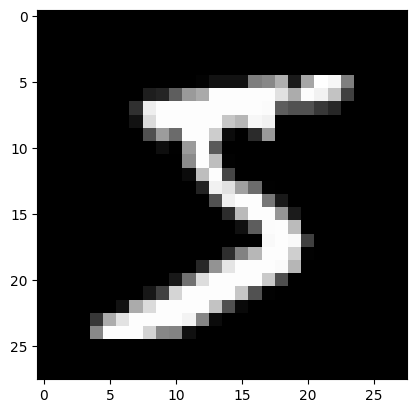

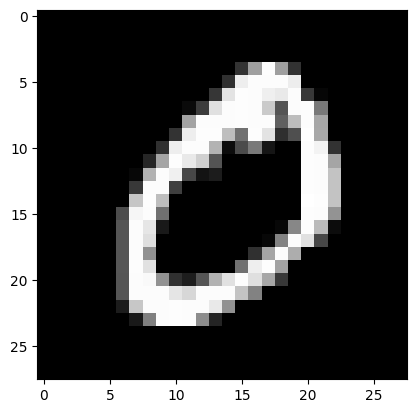

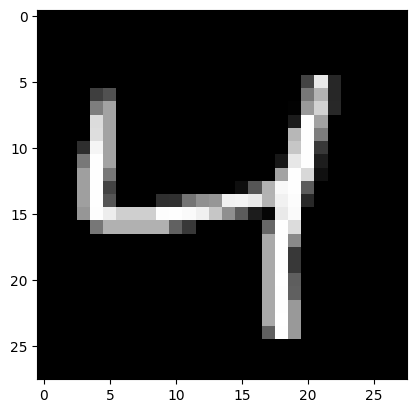

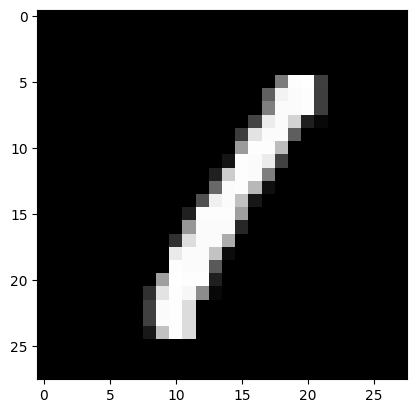

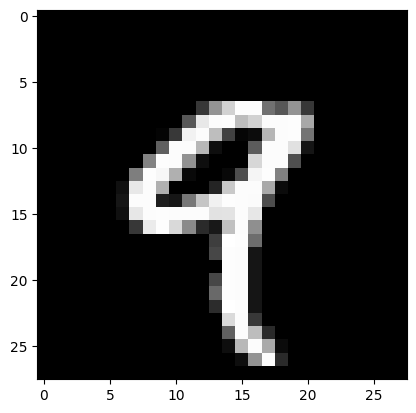

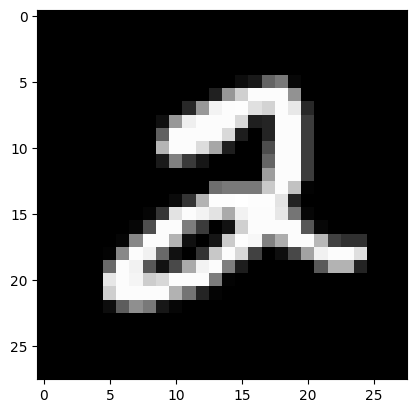

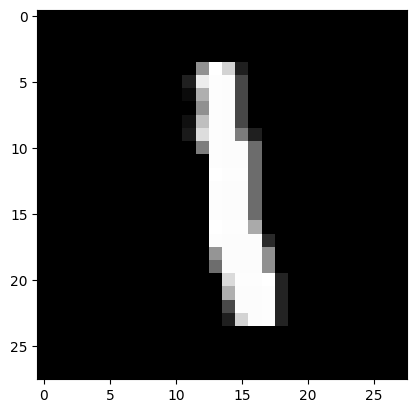

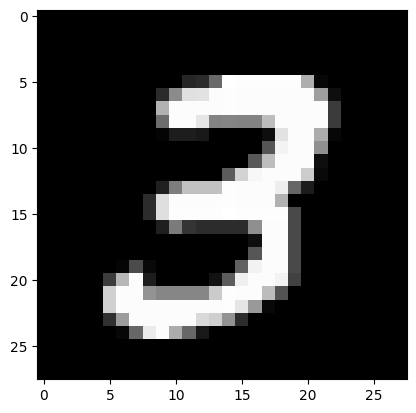

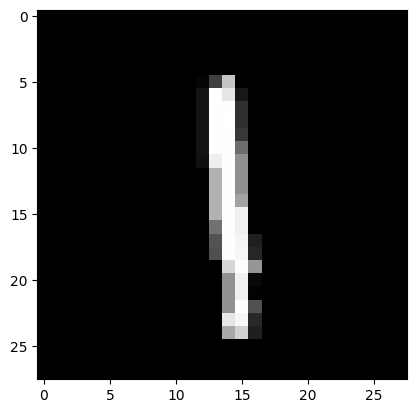

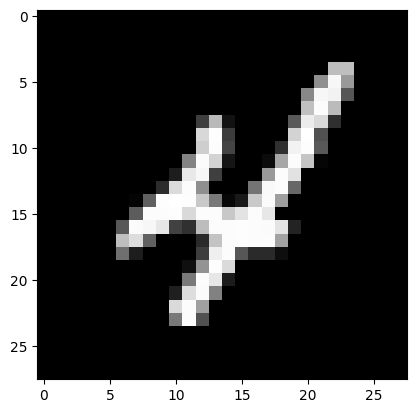

In [ ]:
# Visualizing the images
for i in range(10):
  plt.imshow(X_train[i], cmap='gray')
  plt.show()

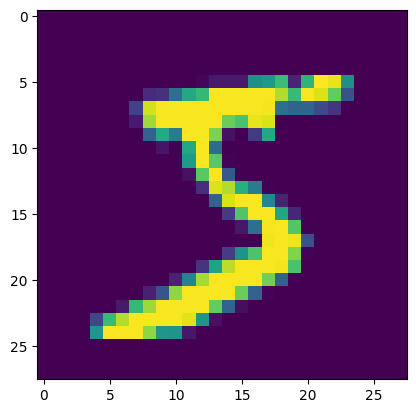

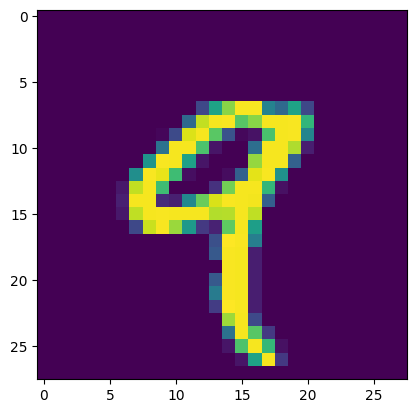

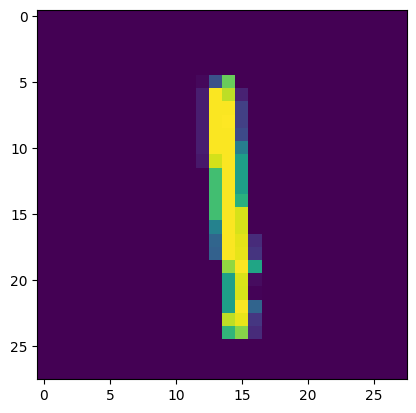

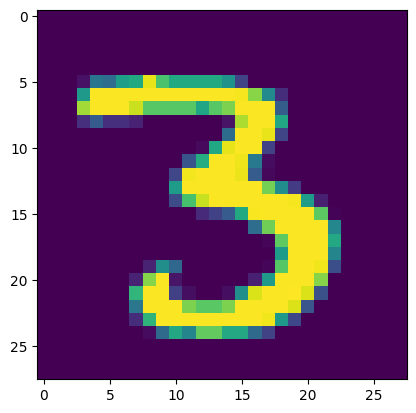

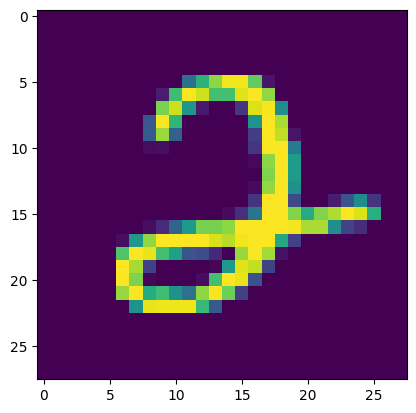

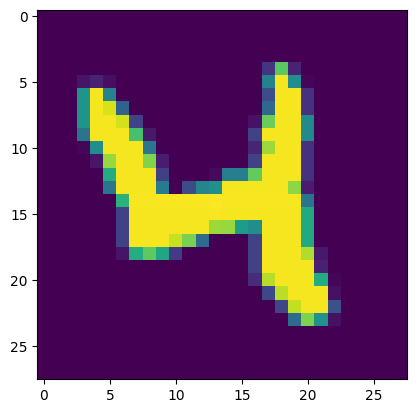

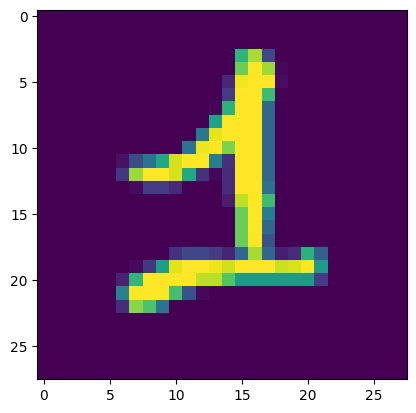

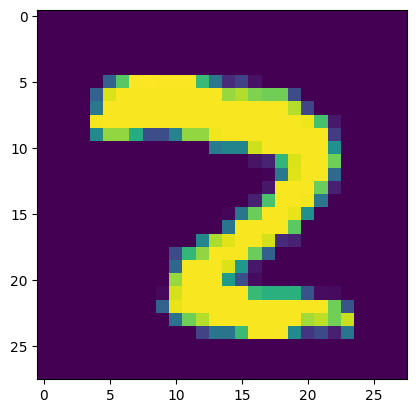

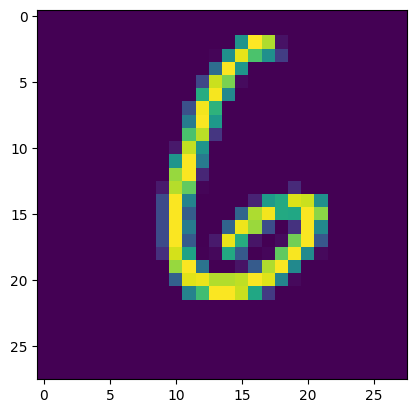

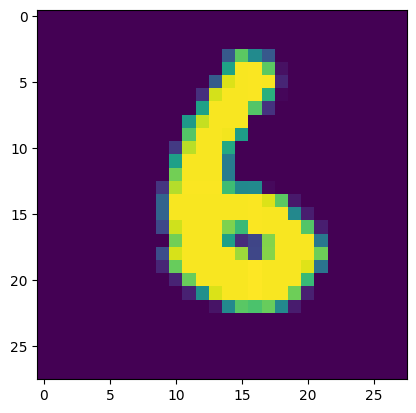

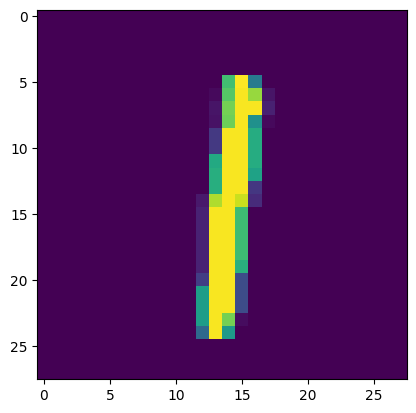

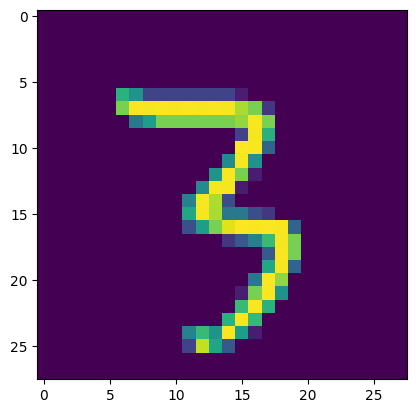

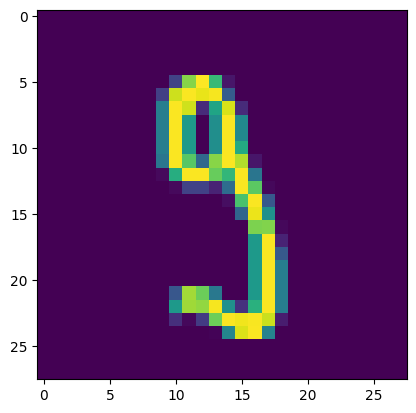

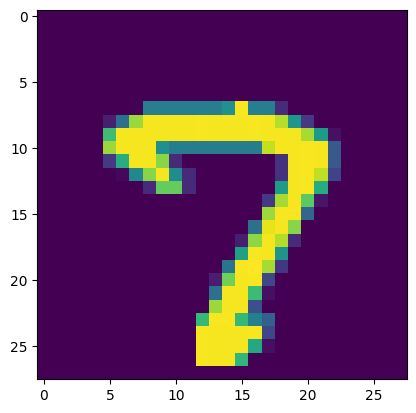

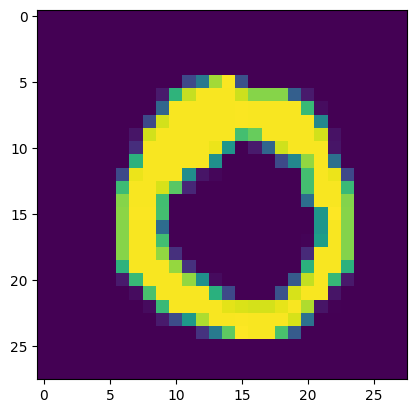

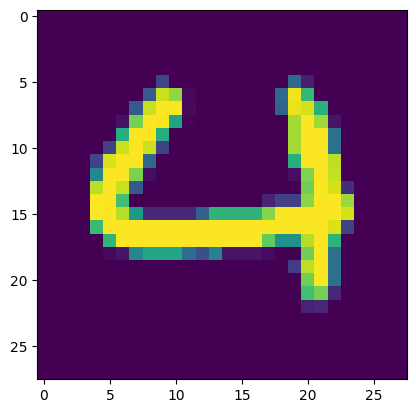

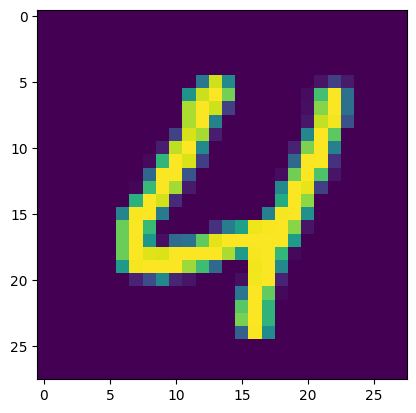

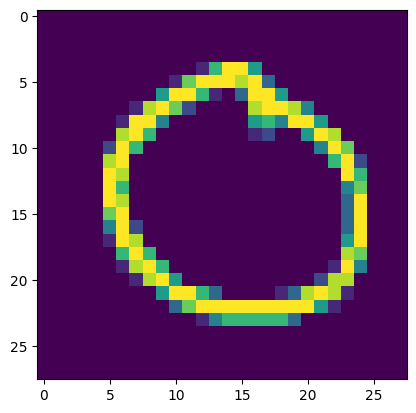

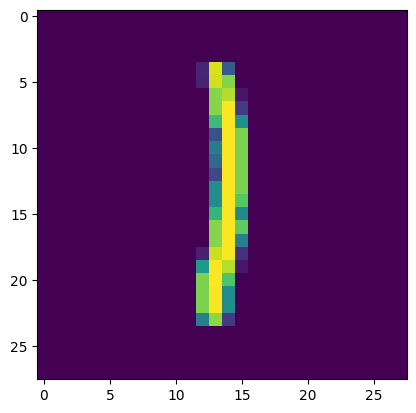

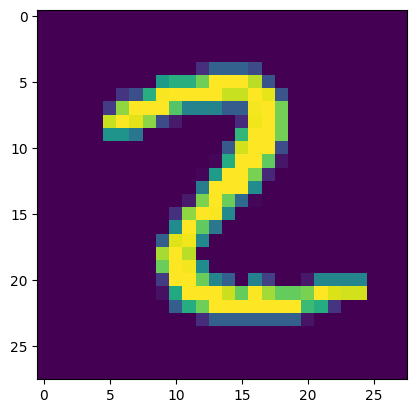

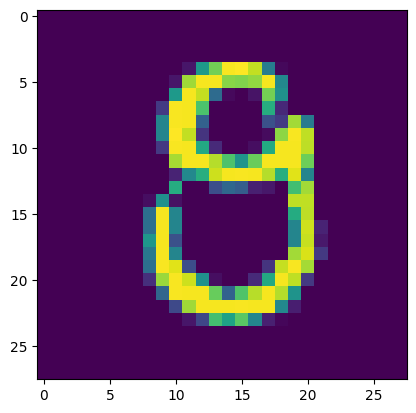

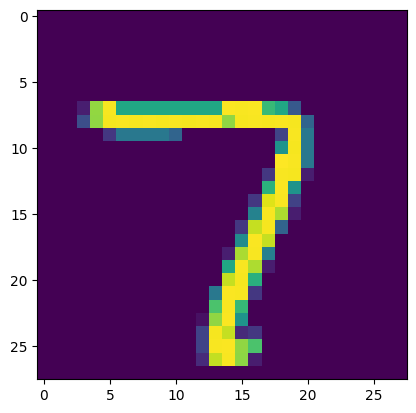

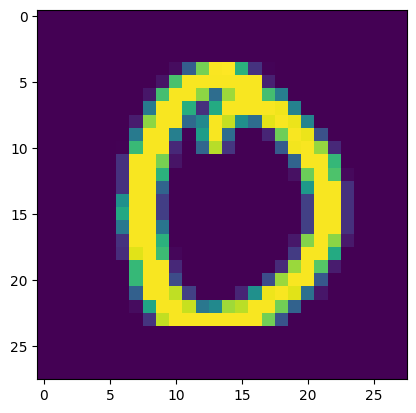

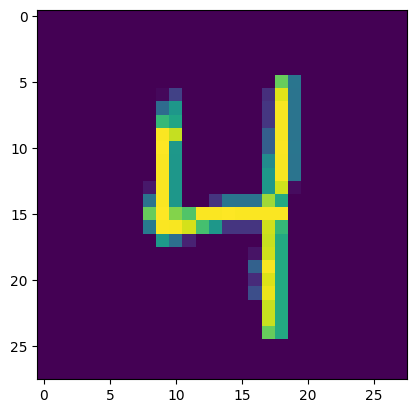

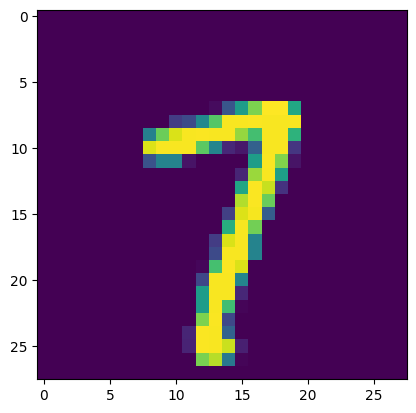

In [ ]:
# Visualizing images between index 0 and 100 with 4 steps
for i in range(0, 100, 4):
  plt.imshow(X_train[i])
  plt.show()

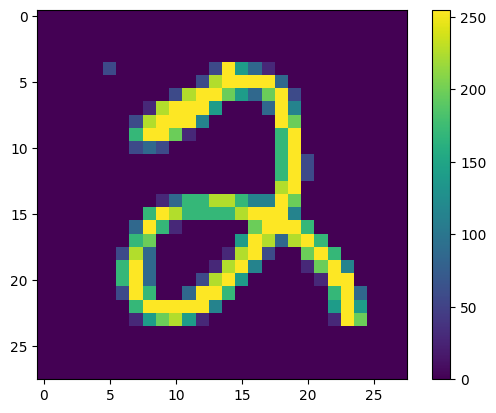

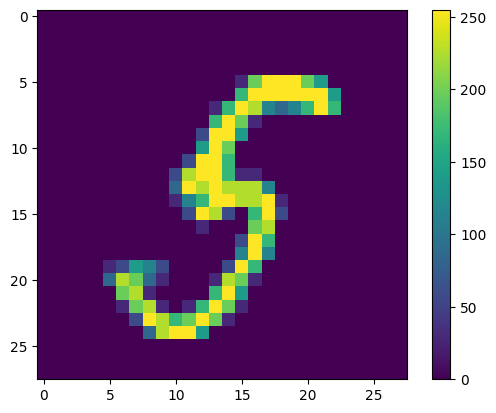

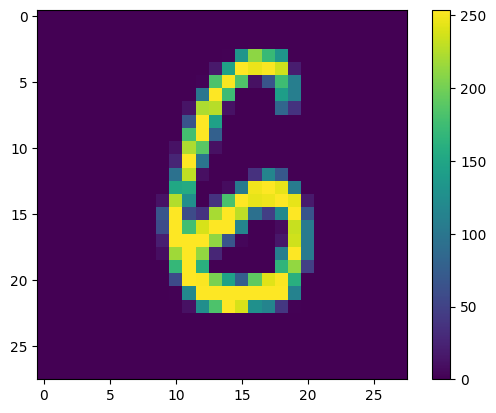

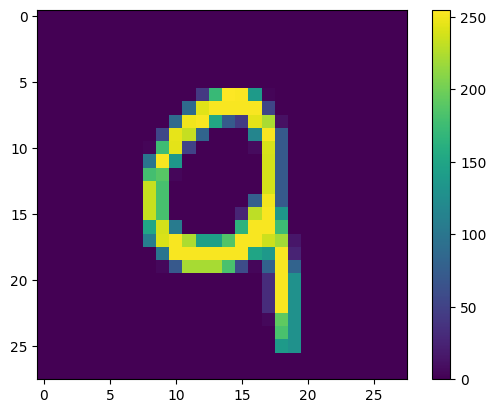

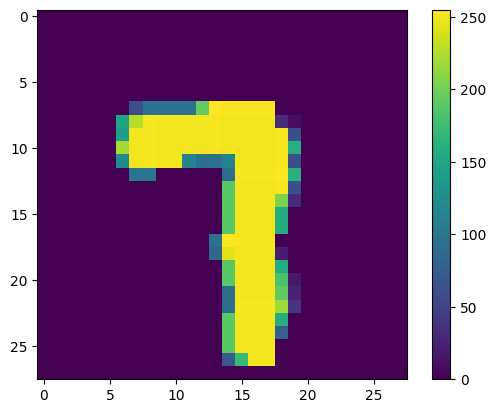

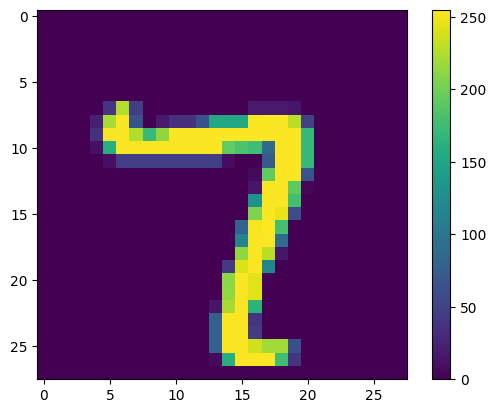

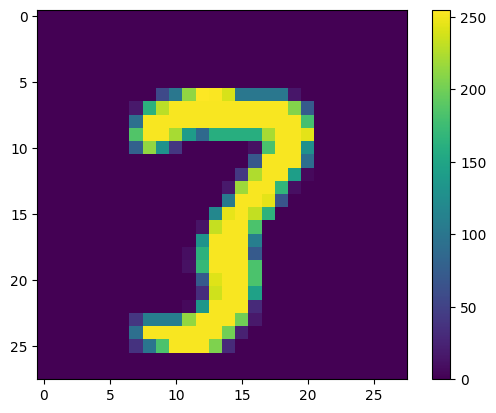

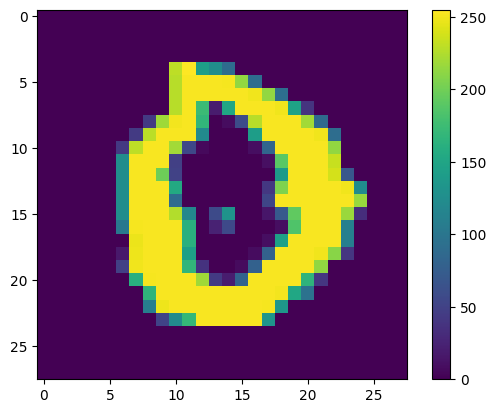

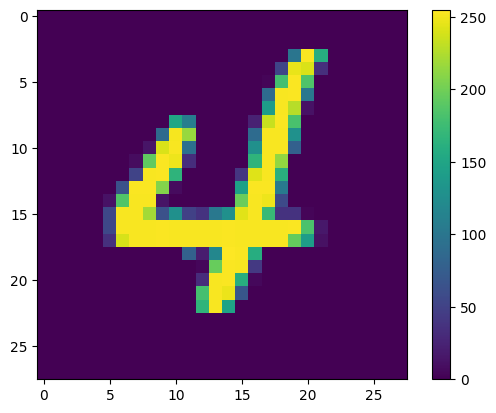

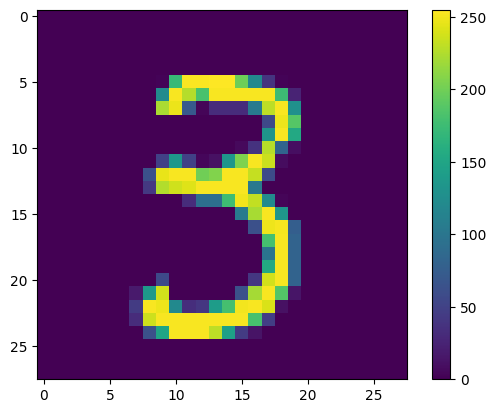

In [ ]:
# Visualizing the images randomly

for i in range(10):
  plt.imshow(X_train[np.random.randint(0, X_train.shape[0])])
  plt.grid(False)
  plt.colorbar()
  plt.show()

# **4 - Data Normaliziation**

In [ ]:
# We are deviding the images by 255 to convert the bits into floats
'''
One picture has 256 bits and this is equal to 2^8, this means in binary we have 0 and 1 and our image is in 8 bit format.
From there we take the 8th power of 2 so we have 256 bits in each image. 1 byte is equal to 8 bits by the way.
'''

X_train_ = X_train / 255.
X_test_ = X_test / 255.

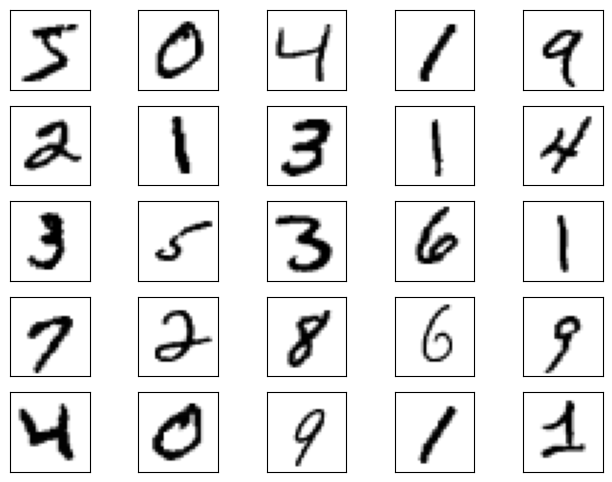

In [ ]:
# Visualizing 25 images
plt.figure(figsize=(8, 6))

for img in range(25):
  plt.subplot(5, 5, img +1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train_[img], cmap=plt.cm.binary)

plt.show()

# **5 - Model Building**

In [ ]:
# Converting the images from 28x28 dimension to 784 featured vectors format
'''
This means, that we convert the 28x28 image to its full resolution with 784 pixels which is normally in a 1:1 ratio.
'''

X_train_ = X_train_.reshape(X_train.shape[0], -1)
X_test_ = X_test_.reshape(X_test_.shape[0], -1)

In [ ]:
X_train_.shape

(60000, 784)

In [ ]:
X_test_.shape

(10000, 784)

In [ ]:
# 1. KNN Model

knn_model = KNeighborsClassifier().fit(X_train_, y_train)

In [ ]:
# Predicting and comparing predicting scores

y_pred_knn = knn_model.predict(X_test_)

pred_accuracy_knn = accuracy_score(y_test, y_pred_knn)
pred_f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
pred_recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
pred_precision_knn = precision_score(y_test, y_pred_knn, average='weighted')

In [ ]:
# Printing out the scores

print(f"Accuracy score (knn): {pred_accuracy_knn}")
print(f"F1 score (knn): {pred_f1_knn}")
print(f"Recall score (knn): {pred_recall_knn}")
print(f"Precision score (knn): {pred_precision_knn}")

Accuracy score (knn): 0.9688
F1 score (knn): 0.9687470572168784
Recall score (knn): 0.9688
Precision score (knn): 0.9690205934964162


In [ ]:
# Printing out the confusion matrix

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_knn

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]])

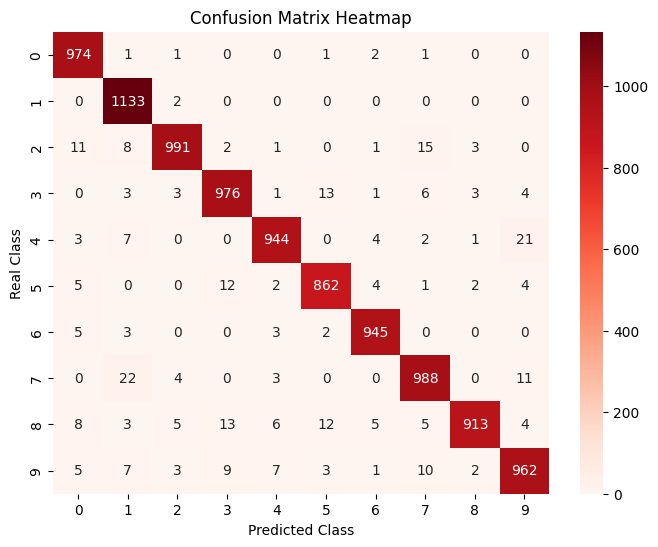

In [ ]:
# Visualizing the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [ ]:
# 2. RandomForest Model

randomforest_model = RandomForestClassifier().fit(X_train_, y_train)

In [ ]:
# Predicting and comparing scores for RandomForest Model

y_pred_rf = randomforest_model.predict(X_test_)

pred_accuracy_rf = accuracy_score(y_test, y_pred_rf)
pred_f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
pred_recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
pred_precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

In [ ]:
# Printing out the scores for RandomForest Model

print(f"Accuracy score (RandomForest): {pred_accuracy_rf}")
print(f"F1 score (RandomForest): {pred_f1_rf}")
print(f"Recall score (RandomForest): {pred_recall_rf}")
print(f"Precision score (RandomForest): {pred_precision_rf}")

Accuracy score (RandomForest): 0.9688
F1 score (RandomForest): 0.9687876726434961
Recall score (RandomForest): 0.9688
Precision score (RandomForest): 0.9688099631842326


In [ ]:
# Printing out the confusion matrix for RandomForest Model

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_rf

array([[ 970,    0,    0,    0,    0,    2,    4,    1,    3,    0],
       [   0, 1122,    3,    3,    1,    2,    3,    0,    1,    0],
       [   6,    0,  999,    4,    2,    1,    2,    9,    8,    1],
       [   0,    0,   10,  972,    0,    7,    0,    8,   10,    3],
       [   1,    0,    2,    0,  955,    0,    4,    1,    3,   16],
       [   2,    0,    1,   14,    3,  858,    5,    2,    5,    2],
       [   5,    3,    1,    0,    4,    5,  935,    0,    5,    0],
       [   3,    3,   18,    2,    0,    0,    0,  990,    2,   10],
       [   5,    0,    4,    8,    6,    6,    3,    4,  930,    8],
       [   5,    6,    0,   13,   11,    3,    1,    2,   11,  957]])

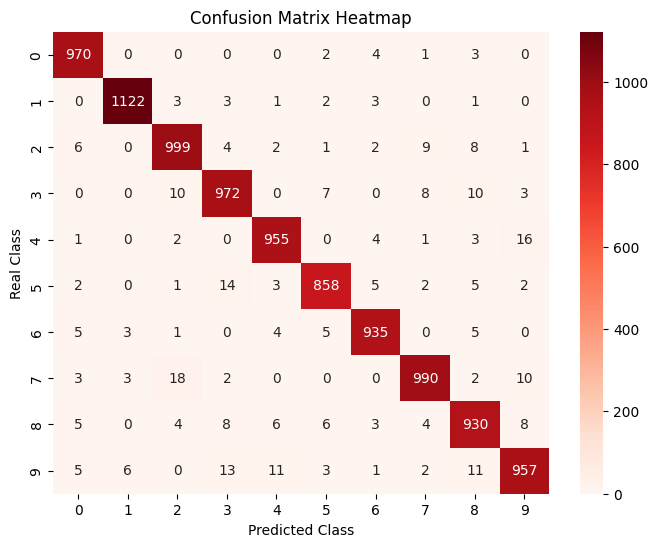

In [ ]:
# Visualizing the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

The problem was that I have used the same name for the variable as the confusion matrix and it tried to make the confusion matrix calculations on the existing one. So, we need to define all variable seperatly to not get an error from the Interpreter.

In [ ]:
# 3. Building a Decision Tree

decision_tree_model = DecisionTreeClassifier().fit(X_train_, y_train)

In [ ]:
# Predicting and comparing scores for Decision Tree

y_pred_dt = decision_tree_model.predict(X_test_)

pred_accuracy_dt = accuracy_score(y_test, y_pred_dt)
pred_f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
pred_recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
pred_precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

In [ ]:
# Printing out scores for Decision Tree

print(f"Accuracy score (DecisionTree): {pred_accuracy_dt}")
print(f"F1 score (DecisionTree): {pred_f1_dt}")
print(f"Recall score (DecisionTree): {pred_recall_dt}")
print(f"Precision score (DecisionTree): {pred_precision_dt}")

Accuracy score (DecisionTree): 0.8783
F1 score (DecisionTree): 0.8781776290641268
Recall score (DecisionTree): 0.8783
Precision score (DecisionTree): 0.8781877933829499


In [ ]:
# Printing out the confusion matrix for Decision Tree

confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
confusion_matrix_dt

array([[ 920,    0,    6,    9,    6,   11,   13,    2,    7,    6],
       [   1, 1093,   11,    6,    1,    2,    6,    5,    7,    3],
       [  15,    7,  882,   32,   18,   10,    8,   25,   26,    9],
       [   8,    6,   31,  859,    9,   44,    5,   11,   22,   15],
       [   5,    4,    8,    7,  857,    7,   23,    9,   16,   46],
       [  13,    7,    6,   44,    8,  747,   26,    7,   19,   15],
       [  17,    5,   10,   11,   20,   20,  846,    0,   24,    5],
       [   2,   12,   26,   17,    8,    4,    2,  929,    7,   21],
       [  13,    7,   25,   31,   23,   31,   17,    9,  794,   24],
       [  18,    2,    7,   21,   38,   14,    4,   20,   29,  856]])

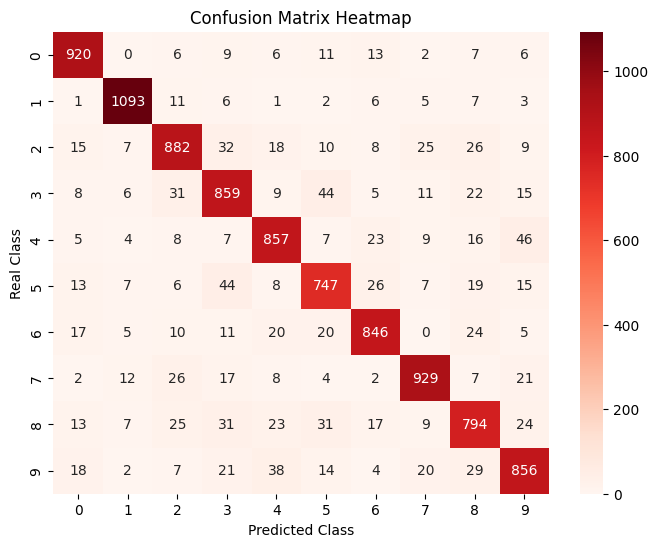

In [ ]:
# Visualizing the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_dt, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [ ]:
# 4. Building SVC model

svc_model = SVC().fit(X_train_, y_train)

In [ ]:
# Predicting and comparing scores for SVC Model

y_pred_svc = svc_model.predict(X_test_)

pred_accuracy_svc = accuracy_score(y_test, y_pred_svc)
pred_f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
pred_recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
pred_precision_svc = precision_score(y_test, y_pred_svc, average='weighted')

In [ ]:
# Printing out scores for SVC Model

print(f"Accuracy score (SVC): {pred_accuracy_svc}")
print(f"F1 score (SVC): {pred_f1_svc}")
print(f"Recall score (SVC): {pred_recall_svc}")
print(f"Precision score (SVC): {pred_precision_svc}")

Accuracy score (SVC): 0.9792
F1 score (SVC): 0.9791856837674859
Recall score (SVC): 0.9792
Precision score (SVC): 0.9792006017788697


In [ ]:
# Printing out the confusion matrix for SVC Model

confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_svc

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]])

This took way more time as I have expected. Let's see how long SVR model will take.

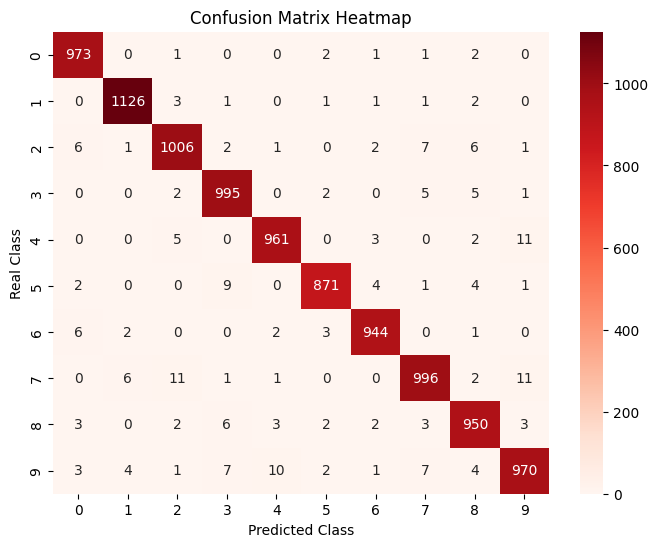

In [ ]:
# Visualizing the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svc, annot=True, fmt='d', cmap='Reds', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

In [ ]:
# 5. Building SVC model

svr_model = SVR().fit(X_train_, y_train)

In [ ]:
# Predicting and comparing scores for SVR Model

y_pred_svr = svc_model.predict(X_test_)

pred_accuracy_svr = accuracy_score(y_test, y_pred_svr)
pred_f1_svr = f1_score(y_test, y_pred_svr, average='weighted')
pred_recall_svr = recall_score(y_test, y_pred_svr, average='weighted')
pred_precision_svr = precision_score(y_test, y_pred_svr, average='weighted')

In [ ]:
# Printing out scores for SVR Model

print(f"Accuracy score (SVR): {pred_accuracy_svr}")
print(f"F1 score (SVR): {pred_f1_svr}")
print(f"Recall score (SVR): {pred_recall_svr}")
print(f"Precision score (SVR): {pred_precision_svr}")

In [ ]:
# Printing out the confusion matrix for SVR Model

confusion_matrix_svr = confusion_matrix(y_test, y_pred_svr)
confusion_matrix_svr

# **6 - Model Building with NN (Neural Networks)**

Ok, while the last model training runs let's build a model with a Neural Network. To work with NNs firstly we have to reshape the images again. For the normalization we will reshape the images dtype to 'float32' to convert the image dimesnsion to 28x28 again easily. This time we will convert the images to grayscale in an one dimensional array.

In [ ]:
mnist_df_ = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist_df_.load_data()

# **6.1 - Data Normalization (NN)**

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.